# Predicting Loan Repayment with Decision Trees and Random Forests

#### The imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

loans = pd.read_csv('/Users/adam/Downloads/loan_data.csv')

In [16]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [18]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Exploratory Data Analysis

#### Histogram of two FICO distributions on top of each other, one for each credit.policy and not.fully.paid outcome.

Text(0.5, 0, 'FICO')

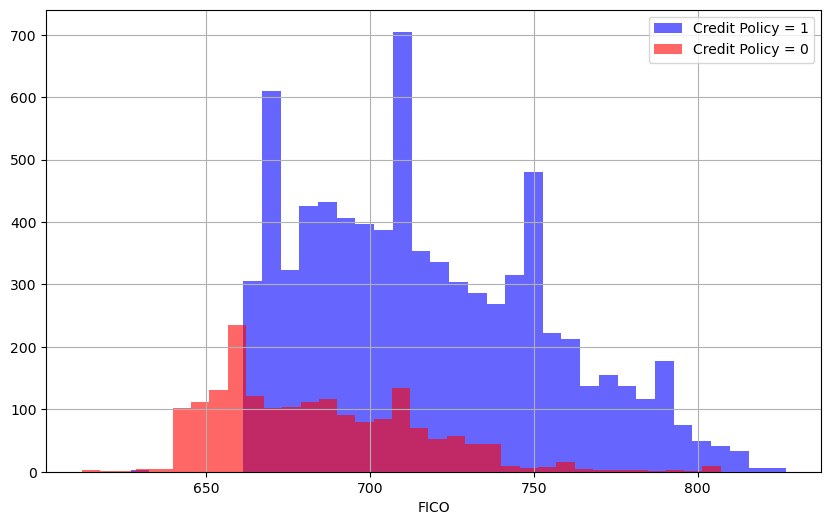

In [30]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue',
                                              label = 'Credit Policy = 1', alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', 
                                              label = 'Credit Policy = 0', alpha=0.6)

plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

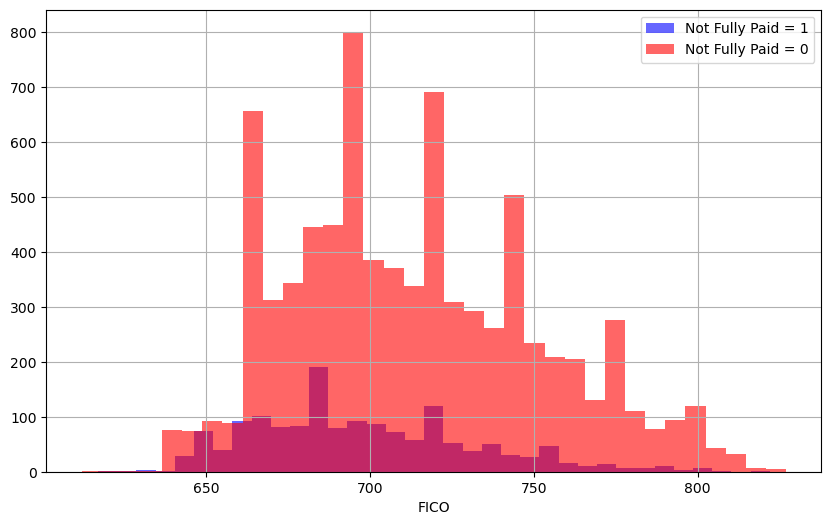

In [32]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, color='blue',
                                              label = 'Not Fully Paid = 1', alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, color='red', 
                                              label = 'Not Fully Paid = 0', alpha=0.6)

plt.legend()
plt.xlabel('FICO')

#### Countplot showing counts of loans by purpose, hue defined by not.fully.paid

AttributeError: 'numpy.int64' object has no attribute 'startswith'

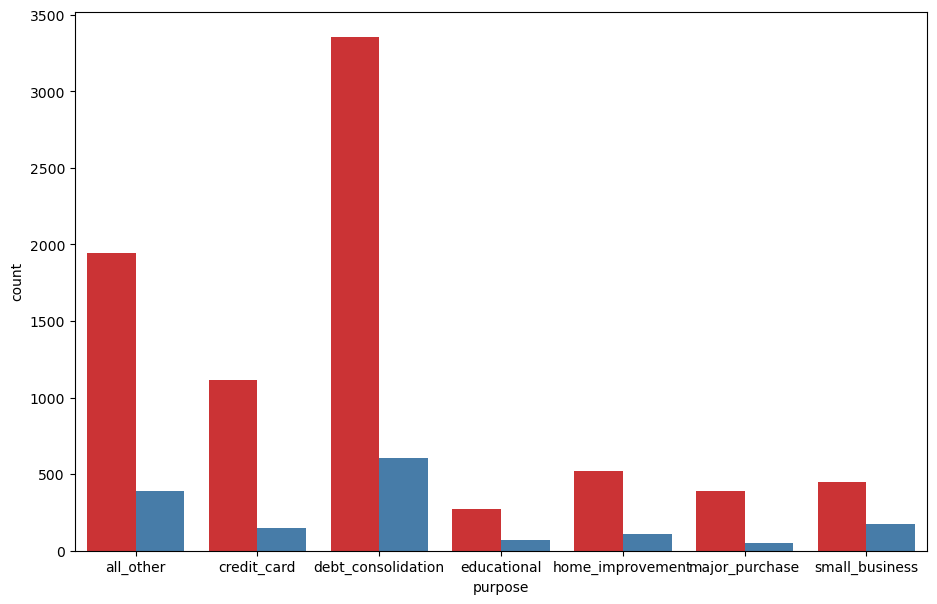

In [174]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette= 'Set1')

#### Looking at the trend between FICO score and interest rate

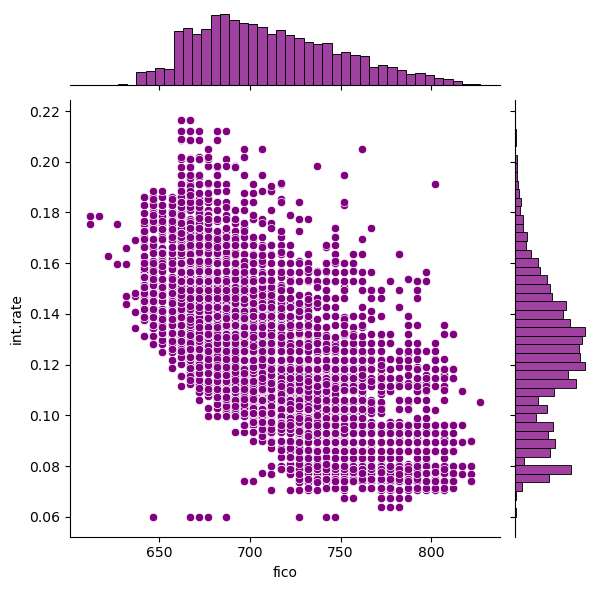

In [86]:
sns.jointplot(x='fico',y='int.rate', data=loans, color='purple')

#### The trends between not.fully.paid and credit.policy

<Figure size 1100x700 with 0 Axes>

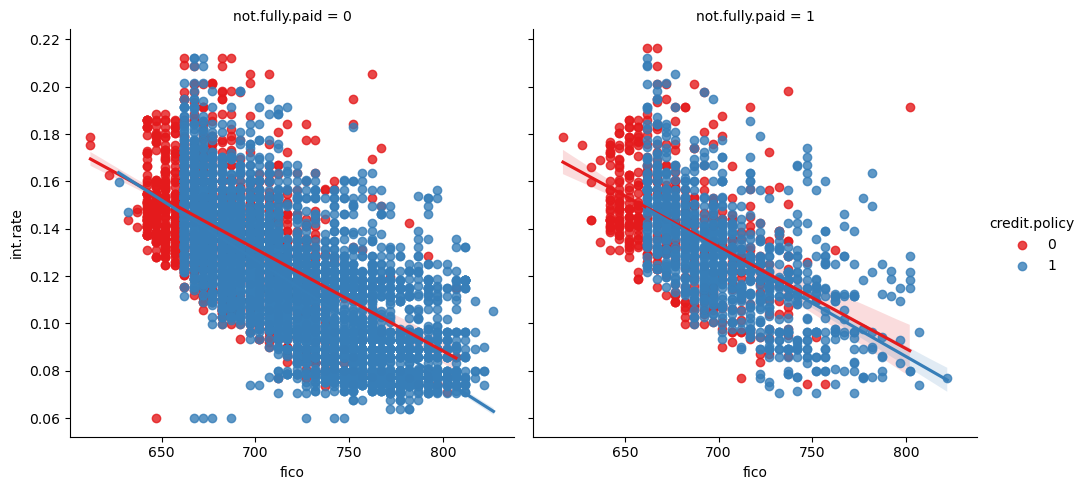

In [66]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy', 
           col='not.fully.paid', palette='Set1')

### Caregorical Features

In [70]:
cat_feats = ['purpose']

In [72]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [78]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


#### Train test split

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Training a Decision Tree Model

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtree = DecisionTreeClassifier()

In [98]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predicitons and Evaluation of Decision Tree

In [102]:
predictions = dtree.predict(X_test)

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [108]:
print(confusion_matrix(y_test, predictions))

[[1998  433]
 [ 343  100]]


#### Training the random Forest model

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc = RandomForestClassifier(n_estimators=300)

In [122]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

#### Preditions and Evaluation

In [126]:
predictions = rfc.predict(X_test)

In [128]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [130]:
print(confusion_matrix(y_test, predictions))

[[2426    5]
 [ 435    8]]


## Conclusion

#### In this project, I explored the use of decision trees and random forests to predict loan repayment status based on various borrower features. The project involved several key steps:

#### Data Preparation: I started by importing the necessary libraries and loading the dataset. I performed exploratory data analysis to understand the structure and distribution of the data. This included visualizing categorical columns like 'purpose' and transforming them into dummy variables using pandas' get_dummies function.

#### Data Splitting: The dataset was then split into training and testing sets using train_test_split from sklearn.model_selection. The features were separated from the target variable ('not.fully.paid').

#### Decision Tree Model: I trained a decision tree classifier and evaluated its performance. The decision tree model provided a baseline accuracy with precision and recall around 75%.

#### Random Forest Model: To potentially improve the model's performance, I trained a random forest classifier. By adjusting the number of estimators, I aimed to enhance the predictive accuracy. The random forest model showed overall better average performance, but it performed worse in recall for certain classes compared to the single decision tree.

#### Evaluation and Comparison: The models were evaluated using confusion matrices and classification reports. While the random forest showed improved overall performance, the single decision tree performed better on specific metrics like recall for certain classes. This highlighted the importance of understanding the specific business context and the costs associated with different types of errors.

#### In this scenario, I would prioritize understanding the specific business needs and the implications of different types of prediction errors. Given that the decision tree model provided better recall for identifying loans that are not fully paid, I would initially lean towards using the decision tree to minimize the risk of missing unpaid loans. However, I would also explore ways to improve the random forest model’s recall through feature engineering and parameter tuning, as it generally offers better overall performance. The final decision would balance the need for accuracy with the business cost of false negatives, ensuring our approach aligns with the company’s risk management strategy.

#### I encourage further exploration, including feature engineering and trying other machine learning models, to enhance the predictive performance tailored to the specific needs of the business problem.

#### Thank you for following along with this project. I hope you found it insightful and informative. Feel free to explore and ask questions.